<a href="https://colab.research.google.com/github/LarissaRandow/mnist/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Test

In [1]:
import numpy as np

file_path = '/content/sample_data/mnist_test.csv'

mnist_data = np.loadtxt(file_path, delimiter=',')

labels = mnist_data[:, 0]
images = mnist_data[:, 1:]

images = images.reshape(images.shape[0], 28, 28)

test_images = images[:10000]
test_labels = labels[:10000]

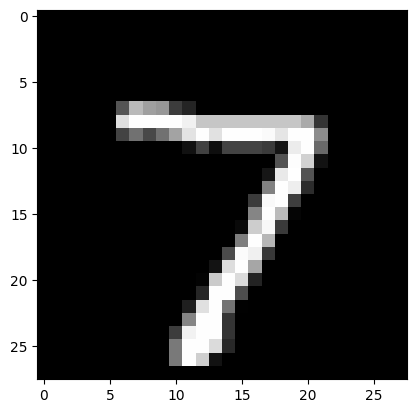

7.0

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(test_images[0], cmap='gray')
plt.show()
test_labels[0]

Dataset Train

In [3]:
file_path = '/content/sample_data/mnist_train.csv'


mnist_data = np.loadtxt(file_path, delimiter=',')

labels = mnist_data[:, 0]
images = mnist_data[:, 1:]

images = images.reshape(images.shape[0], 28, 28)

train_images = images[:10000]
train_labels = labels[:10000]

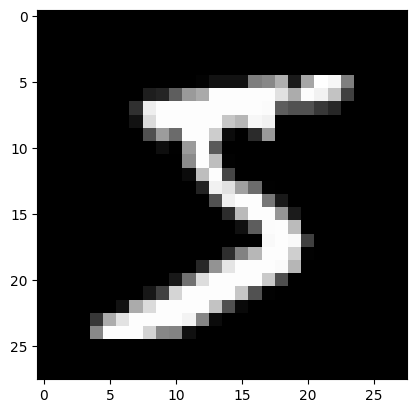

5.0

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.show()
train_labels[0]

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical
import keras
from tensorflow.keras import layers

In [6]:
class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.astype("float32") / 255

In [7]:
class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Conv2D(4, 4, activation="relu"),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1, 28, 28, 1))

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
79/79 [==============================] - 6s 61ms/step - loss: 0.5087 - accuracy: 0.8464
Epoch 2/5
79/79 [==============================] - 4s 47ms/step - loss: 0.2108 - accuracy: 0.9374
Epoch 3/5
79/79 [==============================] - 4s 48ms/step - loss: 0.1376 - accuracy: 0.9596
Epoch 4/5
79/79 [==============================] - 5s 69ms/step - loss: 0.0957 - accuracy: 0.9718
Epoch 5/5
313/313 [==============================] - 2s 7ms/step


0.8864

In [8]:
def define_arquitetura(output_shape):
  model = keras.Sequential([
    layers.Conv2D(4, 4, activation="relu"),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(output_shape, activation="softmax")
  ])
  return model

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = define_arquitetura(yhot.shape[1])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
79/79 [==============================] - 4s 49ms/step - loss: 0.5366 - accuracy: 0.8398
Epoch 2/5
79/79 [==============================] - 4s 50ms/step - loss: 0.2195 - accuracy: 0.9335
Epoch 3/5
79/79 [==============================] - 5s 67ms/step - loss: 0.1446 - accuracy: 0.9570
Epoch 4/5
79/79 [==============================] - 4s 48ms/step - loss: 0.0964 - accuracy: 0.9724
Epoch 5/5
313/313 [==============================] - 4s 12ms/step


0.9574

In [9]:
def define_arquitetura(input_shape, output_shape):
  model = keras.Sequential([
    layers.Input(input_shape),
    layers.Dense(512, activation="relu"),
    layers.Dense(output_shape, activation="softmax")
  ])
  return model

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = define_arquitetura(X.shape[1], yhot.shape[1])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1, 28 * 28))

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
79/79 [==============================] - 3s 24ms/step - loss: 0.5358 - accuracy: 0.8512
Epoch 2/5
79/79 [==============================] - 1s 18ms/step - loss: 0.2559 - accuracy: 0.9268
Epoch 3/5
79/79 [==============================] - 1s 19ms/step - loss: 0.1898 - accuracy: 0.9441
Epoch 4/5
79/79 [==============================] - 1s 18ms/step - loss: 0.1404 - accuracy: 0.9623
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


0.9432

In [10]:
def define_arquitetura(input_shape, output_shape):
  inputs = keras.Input(shape=input_shape)
  x = layers.Dense(512, activation="relu")(inputs)
  outputs = layers.Dense(output_shape, activation="softmax")(x)
  return keras.Model(inputs=inputs, outputs=outputs)

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1, 28 * 28))

modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
79/79 [==============================] - 1s 9ms/step - loss: 0.5404 - accuracy: 0.8500
Epoch 2/5
79/79 [==============================] - 1s 9ms/step - loss: 0.2572 - accuracy: 0.9247
Epoch 3/5
79/79 [==============================] - 1s 9ms/step - loss: 0.1885 - accuracy: 0.9482
Epoch 4/5
79/79 [==============================] - 1s 9ms/step - loss: 0.1417 - accuracy: 0.9595
Epoch 5/5
313/313 [==============================] - 1s 4ms/step


0.9435

In [11]:
def define_arquitetura(input_shape, output_shape):
  inputs = keras.Input(shape=input_shape)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(output_shape, activation="softmax")(x)
  return keras.Model(inputs=inputs, outputs=outputs)

model = define_arquitetura((28,28,1), 10)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 128)         7385

In [12]:
class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = define_arquitetura(X.shape[1:], yhot.shape[1])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

In [13]:
class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1, 28, 28, 1))

In [14]:
modelo = Pipeline([
    ("scaler", DividePor255()),
    ("reshape", MudaShape()),
    ("ann", RedeNeural())
])

modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
79/79 [==============================] - 8s 91ms/step - loss: 0.6830 - accuracy: 0.7899
Epoch 2/5
79/79 [==============================] - 9s 111ms/step - loss: 0.1979 - accuracy: 0.9419
Epoch 3/5
79/79 [==============================] - 7s 93ms/step - loss: 0.1266 - accuracy: 0.9616
Epoch 4/5
79/79 [==============================] - 8s 106ms/step - loss: 0.0894 - accuracy: 0.9724
Epoch 5/5
313/313 [==============================] - 3s 9ms/step


0.9785